In [18]:
#initialframe = 1
#endframe = 11

#initialcluster =1 

#mx = 10

from collections import defaultdict

import csv

import numpy as np

i is 2
key is 6
i is 3
key is 6
i is 4
key is 7
i is 5
key is 7
i is 6
key is 5
i is 7
key is 6
i is 8
key is 4
i is 9
key is 4


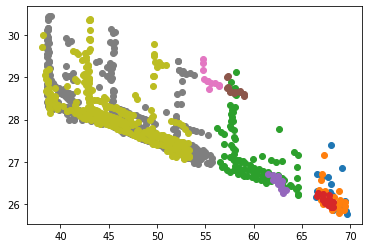

In [201]:

initialcluster= 5

import matplotlib.pyplot as plt


# array to be plotted
arrayx = []

arrayy = []

xvalues = []
yvalues = []

finalarray=[]

totxvalues = defaultdict(list)
totyvalues = defaultdict(list)
# initialize distances map 
mapdistances = defaultdict(list)

obnum =0

currentdistances = []

for j in range(0, mx):
    mapdistances[j]=[]
    totxvalues[j] = []
    totyvalues[j] = []
    
finalarray.append(initialcluster)
    

for i in range(initialframe, endframe):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    firstrow=0
    # clear map
    for j in range(0, mx):
        mapdistances[j] =[]
        totxvalues[j] =[]
        totyvalues[j]=[]
        
    with open(name) as csv_file:
        m = 1000
        
        f =0 
        # reset hxvalues , hyvalues
        hxvalues = []
        hyvalues=[]

        currentmap= {}

        csv_reader = csv.reader(csv_file, delimiter=",")
        
        if i==initialframe:
            #print("i",i)
            for row in csv_reader:
                
                clusterid = float(row[0])
                
                #print("clusterid", clusterid)
                if clusterid==initialcluster:
                    xpoint = float(row[1])
                    ypoint = float(row[2])
                    arrayx.append(xpoint)
                    arrayy.append(ypoint)
                    
            # find average 
            avx = np.mean(arrayx)
            avy = np.mean(arrayy)
            avprev = [avx, avy ]
            #plt.plot(arrayx, arrayy)
            plt.scatter(arrayx, arrayy)
        
            continue
            
        for row in csv_reader:
            clusterid = float(row[0]) # current cluster id 
            
            if clusterid != obnum:
                numo1 = float(obnum)
                mapdistances[numo1] = currentdistances
                totxvalues[numo1] = xvalues
                totyvalues[numo1] = yvalues
                # new comparisons 
                obnum = clusterid
                
                currentdistances=[]
                #currentmap= {}
                
                xvalues =[]
                yvalues =[]
                
                continue
            xpoint = float(row[1])
            ypoint = float(row[2])
            xvalues.append(xpoint) # save to array 
            yvalues.append(ypoint)
            # calc distance
            dx1 = avx - xpoint
            dy1 = avy - ypoint
            d1 = pow(dx1, 2) + pow(dy1, 2)
            dist = pow(d1, 0.5)
            currentdistances.append(dist) 
            
        for j in range(0, mx):
            meandistances = np.mean(mapdistances[j])
            if meandistances < m:
                m = meandistances
                ky = j 
                
        print("i is",i)
        print("key is", ky)
        finalarray.append(ky)
        hxvalues = totxvalues[ky]
        hyvalues = totyvalues[ky]
        
        avx = np.mean(hxvalues)
        avy = np.mean(hyvalues)
        
        #plt.plot(hxvalues, hyvalues)
        plt.scatter(hxvalues, hyvalues)
        
        # print mean
        #print("mean x,",np.mean(hxvalues))
        #print("mean y,",np.mean(hyvalues))
        
        # reset hxvalues and hyvalues (don't need )
        hxvalues =[]
        hyvalues =[]
        
plt.show()

In [203]:
finalarray

[5, 6, 6, 7, 7, 5, 6, 4, 4]

In [ ]:
# code to find out the num of clusters in the current frame

i = 10 # start frame 
name = "file_out"
name = name+str(i)
name = name+".csv"
firstrow=0

with open(name) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")

    for row in csv_reader:
        clusteridfinal = row[0]


In [56]:
# check accuracy with app 
listclusterids =finalarray

In [65]:
finalarray

[3, 4, 5, 4, 5, 4, 5, 4, 4]

In [14]:
initialcluster

1

In [214]:
initialcluster = 5

# check accuracy with datastore.mat
datastorename = 'newdatastoreMay17.csv'


#curr_cluster = 0 

initialframe = 1
endframe = 10 

currentframe = initialframe

#initialcluster 

result = []
result.append(initialcluster)

prevmatched = initialcluster

boolean = 1 # if there is still a next match 

rownum = 0

# append from first frame

with open(datastorename) as datastore_csv_file:
    datastore_csv_reader = csv.reader(datastore_csv_file, delimiter=",")
    
    for row in datastore_csv_reader:
        rownum =rownum+1
        
        # 1 - frame 
        framenum = float(row[0])
        
        # 2 - cluster id
        clusterid = float(row[1])
        matched = float(row[18]) 
        
        # if past end frame
        if framenum > endframe:
            break
        
        if framenum < initialframe:
            continue
            
            
        if framenum != currentframe:
            if boolean == 0:
                #print("bool break")
                #print("row,", rownum)
                
                break # no more next match
                
            # append to matched
            #print("row num,", rownum)
            result.append(nextmatched)
            
            prevmatched = nextmatched
            
            boolean = 0
            
            currentframe = framenum
            
        #print("frame num", framenum)
                
        
        

        
        if clusterid == prevmatched:
            nextmatched = matched
            boolean = 1 # found the next match
            

row num, 602
row num, 971
row num, 1529
row num, 2360
row num, 3288
row num, 3829
bool break
row, 4232


In [49]:
listclusterids

[3, 4, 5, 4, 5, 4, 5, 4, 4]

In [411]:
result = [8, 9, 6, 7, 7, 7, 2, 2, 1, 1, 2]

In [471]:
#result= [8, 9.0, 6.0, 7.0]
result = [8, 9, 6, 7, 7, 7, 2, 2, 1, 1, 2]

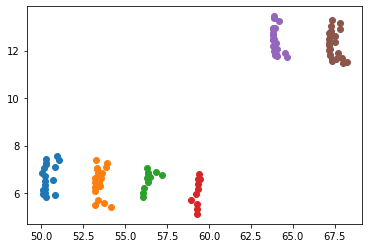

In [472]:
# plot other clusters

alen = len(result)

# counter for array el
acounter = 0

endframe=36

for i in range(initialframe, endframe):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    
    
    a = result[acounter]
    xarray = []
    yarray = []
    with open(name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        for row in csv_reader:
            clusterid = float(row[0])
            xpoint = float(row[1])
            ypoint = float(row[2])
            
            if clusterid == a:
                xarray.append(xpoint)
                yarray.append(ypoint)
                
                
        # plot
        plt.scatter(xarray,yarray)
    
    acounter =acounter +1
    if acounter > alen:
        break

plt.show()
    

In [103]:
a = [1,2,3,4]
al = len(a)
#a[al-1]
a[-1]

4

In [104]:
errorclusters

{6: [[4, 5]],
 7: [[5, 6]],
 14: [[5, 7]],
 15: [[2, 3]],
 16: [[3, 4, 5]],
 17: [[2, 3, 4]],
 18: [[2, 3]],
 20: [[2, 3]],
 22: [[3, 4]],
 23: [[2, 3, 4]],
 24: [[2, 4, 3]],
 25: [[2, 3, 5]],
 26: [[2, 4, 5]],
 27: [[4, 5]],
 28: [[2, 4]],
 29: [[2, 3]],
 30: [[2, 3], [7, 9]],
 34: [[4, 5]],
 35: [[5, 6], [3, 10, 11]],
 36: [[5, 6]],
 38: [[5, 6, 7], [8, 9, 10]],
 39: [[6, 7], [10, 11]],
 41: [[5, 6], [1, 2], [8, 11, 12]],
 43: [[8, 11]],
 44: [[1, 7], [10, 11]],
 45: [[8, 7], [11, 12]],
 46: [[5, 6]],
 47: [[2, 3]],
 48: [[5, 6]],
 51: [[1, 2]],
 52: [[1, 2]],
 54: [[1, 2]],
 56: [[1, 2]],
 57: [[1, 2]],
 58: [[1, 2]],
 59: [[1, 2]],
 60: [[1, 2]],
 61: [[1, 2]],
 62: [[1, 2]],
 63: [[1, 2]],
 66: [[1, 2], [5, 6]],
 70: [[4, 5]],
 71: [[1, 3]],
 74: [[2, 3]],
 78: [[1, 6], [10, 11], [7, 8]],
 79: [[1, 2], [6, 7]],
 91: [[8, 10]],
 97: [[2, 3]],
 99: [[3, 5]],
 100: [[1, 4]],
 102: [[7, 8, 9]],
 103: [[2, 3]],
 114: [[4, 5]],
 115: [[1, 2]],
 118: [[1, 2]],
 119: [[1, 2]],
 123: [[1, 

In [155]:
4 in errorclusters[100][0]

True

In [236]:
# test frame 6

# sim clusters: 4 and 5
# missed: len listclusterids < len result
result = [6,6,6,6,6,4,6]
listclusterids = [6,6,6,6,6,5]

# does 5 go to 4? 


In [185]:
# test continued matching
# frame 7 : clusters 5 and 6 

result= [5,5,5,5,5,5,5] #app
listclusterids = [5,5,5,5,5,5,5,5]

In [233]:
errorclusters[6]

[[4, 5]]

In [235]:
findnextclusterdist(6, 5) # frame, element

6

In [223]:
appfindnextcluster(3, 7) # cluster and frame

6.0

In [128]:
result

[6, 6, 6, 6, 6, 4, 6]

In [131]:
listclusterids[6]

IndexError: list index out of range

In [205]:
errorclusters[2] = [[4,5]] #manual test

In [225]:
errorclusters[3] = [[5, 6]] # manual test

In [230]:
result = [3,5]
listclusterids = [3,5,5]

In [220]:
appfindnextcluster(7, 3) # frame 2

3.0

In [224]:
appfindnextcluster(2,5)

6.0

In [227]:
initialframe=1
# next initial frame must start from 11 

# missed 
\lambda


In [256]:
# missed
# continued 
# wrong 

missedmatching=0
continuedmatching=0
wrongmatching=0
clustering_error = 0
totalcomparisons = 0

# lengths 
len1 = len(result) #datastore result
len2 = len(listclusterids) # our result 

print(len1)
print(len2)

setlen = min(len1, len2)

removemissed= 0
removecontinued =0 
contmatching =1 

missedflag =0
continuedflag=0

iframe = initialframe+setlen

if len2 < len1: # missed matching
    # find if there is a wrong matching first 
    setlen = len2-1 # do not compare the last element
    wrongfirst =0
    nolongerwrong = 0
    for j1 in range(0, setlen):
        frameno1 = initialframe+ j1
        if result[j1] != listclusterids[j1]:
            v1 = errorclusters.get(frameno1)
            if v1 != None:
                if result[j1] in v1:
                    if listclusterids[j1] in v1:
                        # no longer wrong
                        nolongerwrong =1
            if nolongerwrong!=1:
                print("wrong first in missed matching in", c, "at frame",i)
                wrongfirst=1
    # check last element of our array for similar clusters which may match to next cluster of app
    lastelement = listclusterids[setlen]
    if wrongfirst ==0:
        missedflag= 1
        print("missed matching at,", c)
        #print("length of missed", len2)
        missedmatching = missedmatching+1
        totalcomparisons = totalcomparisons+setlen 
        
        v = errorclusters.get(initialframe+ setlen)
        iframe = initialframe+setlen
        print("iframe", iframe)
        if v != None:
            errorarray = errorclusters[initialframe+setlen]
            # must check if similar cluster linked to current 
            res = []
            for el in errorarray:
                # each group of clusters
                if lastelement in el:
                    arraywithlast = el
                    for a in arraywithlast:
                        nc = findnextclusterdist(iframe, a)
                        if nc!= 0:
                            res.append(nc)
            nextlen =len2
            print("res next len", result[nextlen])
            print("res", res)
            if result[nextlen] in res:
                # removed missed matching
                removemissed = 1
                #missedmatching = missedmatching-1
                #clustering_error= clustering_error+1 
                #break # only need 1 match

if removemissed==1:
    print("remove missed matching at", c)
    missedmatching = missedmatching-1
    clustering_error= clustering_error+1 

if len1 < len2: # continued matching 
    setlen = len1 -1 
    iframe = initialframe + setlen
    # must check if wrong first (too)
    wrongfirstcont = 0  # keep this as an indicator for comparison 
    #contmatching= 1 # do not remove cont. matching
    nolongerwrong2 = 0
    for j2 in range(0, len1-1 ): 
        frameno2 = initialframe+j2
        if result[j2] != listclusterids[j2]:
            # first check errorclusters 
            v1 = errorclusters.get(frameno2)
            if v1 != None:
                if result[j2] in v1:
                    if listclusterids[j2] in v1:
                        nolongerwrong2=1
                        
            if nolongerwrong2 != 1:
                wrongfirstcont=1
            
    if wrongfirstcont ==0:
        continuedflag=1
        print("cont. matching at ",c)
        continuedmatching = continuedmatching+1
        totalcomparisons = totalcomparisons + setlen
        # scenario 1 : step 1: compare last el of result 
        
        seclast1 = listclusterids[setlen]
        last2 = result[setlen]
        last1 = listclusterids[setlen+1]
        # sim clusters to a1[setlen+1]
        #a1next = listclusterids[setlen+1]
        
        print("v frame", initialframe+setlen)
        
        
        v = errorclusters.get(initialframe+ setlen) # similar clusters to last a2 element 
        v2 = errorclusters.get(initialframe+setlen+1) # similar clusters to last a1 element
        
        print("v2 index", initialframe+setlen+1)
        existsimilarlast1 = 0
        existsimilar2 = 0
        
        print("iframe", iframe)
        
        contmatching = 1
        #print("v2" , v2)
        if v2 != None:
            for gp in v2:
                if last1 in gp:
                    existsimilarlast1 =1 
                    simlast1 = gp # similar clusters to a1 's last

        #initpluslen1 = initialframe+setlen
        if v != None: 
            errorarray = errorclusters[initialframe+setlen]
                        
            if seclast1 ==last2: #scenario 1 
                print("scenario 1")
            # if it is in similar clusters
                res2 = []
                for el in errorarray:
                    if last2 in el:
                        arraywithlast = el
                        for a in arraywithlast:
                            #print("iframe,", iframe,"a",a)
                            nc = appfindnextcluster(iframe, a)
                            if nc != 0:
                                res2.append(nc)
                # if v2 is not none
                if v2 == None:
                    if last1 in res2:
                        print("match discont. v2")
                        contmatching=0
                if v2!=None:
                    for el2 in simlast1:
                        if el2 in res2:
                            print("match discont. cont. matching")
                            contmatching =0 # false cont. matching

            else:
                res2 = []
                # scenario 2 
                print("scen. 2")
                for el in errorarray: # each group of clusters
                    if seclast1 in el and last2 in el:
                        print("exists similar 2")
                        existsimilar2 = 1
                        sim = el # s group
                if existsimilar2 == 1:
                    # next cluster from elements in s
                    print("sim", sim)
                    for s in sim:
                        print("iframe", iframe)
                        nc = appfindnextcluster(iframe, s)
                        if nc != 0:
                            res2.append(nc)
                    print("res2", res2)
                if v2 == None:
                    #print("last1", last1)
                    if last1 in res2:
                        print("match discont. v2")
                        contmatching = 0
                if v2 != None:
                    for el2 in simlast1:
                        if el2 in res2:
                            print("match discont. cont. matching v2 ")
                            contmatching =0
                        
if contmatching == 0: #removecontinued==1:
    print("remove cont. matching at", c)
    continuedmatching = continuedmatching-1
    clustering_error= clustering_error+1

if missedflag==1 or continuedflag==1:
    print("do not check wrong")
else:
    for j in range(0, setlen):
        frameno = initialframe+j
        totalcomparisons = totalcomparisons+1
        if result[j] != listclusterids[j]:
            # first check errorclusters for wrong found
            v = errorclusters.get(frameno)
            if v!= None:
                if result[j] in v:
                    if listclusterids[j] in v:
                        print("no longer wrong")
                        break
            print("wrong found")
            wrongmatching = wrongmatching+1
            break 

                    

3
11
cont. matching at  6
v frame 12
v2 index 13
iframe 12


In [41]:
result = [3,3,3,3]
listclusterids = [3,3,2]


In [63]:
findnextclusterapp(6, 4)

5.0

In [212]:
result = [1,2,3,4,1,3]
listclusterids = [1,1,1,1,1,5,7] 

In [95]:
listclusterids = [1,1,1,1,1]

In [96]:
result

[1, 1, 1, 1, 1, 4]

In [84]:
booleanwrong

[0, 0, 0, 0, 0, 0]

In [82]:
v1

[[4, 5]]

In [273]:
findnextclusterdist(3,3)

2

In [300]:
result= [2,4,5]
listclusterids = [2,3]
#result = [5, 6.0, 7.0, 6.0, 7.0, 5.0, 6.0]
#listclusterids= [5, 6, 6, 7, 7, 5, 6, 4, 4, 5]
#result= [2, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0]
#listclusterids= [2, 3, 4, 3, 4, 3, 3, 1, 1, 1]

In [301]:
# evaluation 2
d1= {}
d2={}

missedmatching=0
continuedmatching=0
wrongmatching=0
clustering_error = 0
totalcomparisons = 0

# lengths 
len1 = len(result) #datastore result
len2 = len(listclusterids) # our result 

removemissed= 0
removecontinued =0 
contmatching =1 
# ADDED
missedflag =0
continuedflag=0

iframe = initialframe+min(len1, len2)

# calculate diff
difflen = max(len1, len2) - min(len1, len2)
# iterate over shorter length 

setlen = min(len1, len2)

# check which are not matching
nonmatchingframes = []
nonmatchingids1 = [] # corresponding ids from app
nonmatchingids2 = [] # corresponding ids other method

# orig dictionary
od1 = {} # app 
od2 = {}

booleanwrong = []

for j1 in range(0, setlen):
    nolongerwrong = 0
    frameno = initialframe+j1
    od1[frameno] = [result[j1]] # original dictionary 
    od2[frameno] = [listclusterids[j1]]
    if result[j1] == listclusterids[j1]:
        nolongerwrong=1
    if result[j1] != listclusterids[j1]:
        v1 = errorclusters.get(frameno)
        print("j1", j1, "frameno", frameno)
        if v1 != None:
            errorarray = errorclusters[frameno]
            for el in errorarray:
                if result[j1] in el:
                    if listclusterids[j1] in el:
                        print("sim clusters")
                        nolongerwrong=1
    if nolongerwrong != 1:

        nonmatchingframes.append(frameno)
        nonmatchingids1.append(result[j1])
        nonmatchingids2.append(listclusterids[j1])
        booleanwrong.append(1) # wrong
    else:
        booleanwrong.append(0) # not wrong 
        
maxlen= max(len1, len2)

last1 = result[setlen-1]
last2 = listclusterids[setlen-1]

if len1 != len2:
# iterate over setlen to max len
    for j2 in range(setlen, maxlen):
        nolongerwrong=0
        nolongerwrongoriginal =0
        frameno2 = initialframe+j2
        
        if len1 > len2:
            # look up
            next2 = findnextclusterdist(frameno2, last2)
            if next2 == result[j2]:
                nolongerwrong=1
                nolongerwrongoriginal=1
                #booleanwrong.append(0)
            # check error clusters
            v2 = errorclusters.get(frameno2)
            #print("v2", v2)
            if v2 != None:
                errorarray = errorclusters[frameno2]
                for el in errorarray:
                    if result[j2] in el:
                        if next2 in el:
                            nolongerwrong=1
            if nolongerwrong==1:
                booleanwrong.append(0) # not wrong
                if nolongerwrongoriginal==0:
                    clustering_error= clustering_error+1
            else:
                booleanwrong.append(1) # wrong
            
            last2 = next2
            # look up 
            
        if len2 > len1:
            next2 = findnextclusterapp(frameno2, last2)
            if next2 == listclusterids[j2]:
                nolongerwrong=1
                nolongerwrongoriginal=1
            v2 = errorclusters.get(frameno2)
            if v2 != None:
                errorarray = errorclusters[frameno2]
                for el in errorarray:
                    if listclusterids[j2] in el:
                        if next2 in el:
                            nolongerwrong=1
            if nolongerwrong==1:
                booleanwrong.append(0)
                if nolongerwrongoriginal==0:
                    clustering_error= clustering_error+1
            else:
                booleanwrong.append(1) # wrong
            last2 = next2

j1 1 frameno 2


In [291]:
booleanwrong

[0, 1, 1]

In [198]:
d2

{1: [1], 2: [1], 3: [1], 4: [1], 5: [1], 6: [5], 7: [2], 8: []}

In [304]:
d1

{1: [2], 2: [4], 3: [5], 4: []}

In [180]:
d2

{1: [1],
 2: [1],
 3: [1, 3],
 4: [1, 2],
 5: [1, 2],
 6: [5, 1, 2],
 7: [2, 6, 1],
 8: [1, 4, 3]}

In [155]:
od2

{1: [1], 2: [1], 3: [1], 4: [1], 5: [1], 6: [5]}

In [92]:
listclusterids[setlen]

2

In [94]:
result[setlen-1]

4

The following sets the dictionaries d1 and d2 which map each frame to a set of clusters found in that frame by both arrays.


In [303]:
# eval 2 b
# dictionary: frameno -> set of clusters for both results
d1 = {}
d2 = {}
# find path from each sim cluster
for j1 in range(0, setlen):
    frameno = initialframe+j1
    # check similar clusters
    clusters1 = od1[frameno]
    clusters2 = od2[frameno]
    
    simclusters = errorclusters.get(frameno)
    if simclusters != None:
        simarray = errorclusters[frameno]
        # check if matches
        for el in simarray:
            if od1[frameno] in el:
                clusters1.extend(el)
            if od2[frameno] in el:
                clusters2.extend(el)
    d1[frameno] = clusters1
    d2[frameno] = clusters2

# add empty entries for range setlen to maxlen   
maxlen= max(len1, len2)
# set original clusters for up to maxlen
for j2 in range(setlen, maxlen):
    frameno = initialframe+j2
    d1[frameno] = []
    d2[frameno] = []
    if len1>len2:
        d1[frameno]= [result[j2]]
    if len2>len1:
        d2[frameno]=[listclusterids[j2]]

d1[maxlen+1] = []
d2[maxlen+1] = []


{1: [2], 2: [3], 3: [4], 4: [3]}

In [296]:
d1

{1: [2], 2: [4, 3.0], 3: [5, 4.0], 4: [4.0, 3.0]}

In [201]:
d2

{1: [1],
 2: [1],
 3: [1, 3],
 4: [1, 2],
 5: [1, 2],
 6: [5, 1, 2],
 7: [2, 6, 1],
 8: [1, 4, 3]}

In [151]:
d2

{1: [1],
 2: [1, 1],
 3: [1, 3, 3],
 4: [1, 1, 2, 2],
 5: [1, 1, 1, 2, 2],
 6: [5, 1, 1, 1, 2, 2],
 7: [6, 2, 2, 2, 1, 1]}

In [310]:
findnextclusterdist(3,4)

3

In [307]:
findnextclusterapp(3, 4)

3.0

The following updates the maps d1, d2 for each array.
Then at the end of each iteration of the frame, it finds the common elements between clusters within that frame, and removes the 1 from booleanwrong if it found a match. 

In [294]:
# evaluation 3

# make map for comparing
#m1 = {}
#m2 = {}


setlen = min(len1, len2)
maxlen= max(len1,len2)
# look for wrong matching

for j in range(0, maxlen):
    
    frameno = initialframe+j 
    print("j is", j)
    print("frame num is", frameno)
    
    # all clusters within current frame
    clust1 = d1[frameno]
    clust2 = d2[frameno]
    
    
    # check clusters to next step
    for c1 in clust1:
        nc1 = findnextclusterapp(frameno, c1)
        #print("frameno plus one", frameno+1)
        #print("nc1", nc1)
        nclust1 = d1[frameno+1]
        # only append if not already there
        if nc1 not in nclust1:
            nclust1.append(nc1)
        #nclust1.append(nc1)
        #nclust1 = np.unique(nclust1)
        d1[frameno+1] = nclust1
    
    for c2 in clust2:
        nc2 = findnextclusterdist(frameno, c2)
        nclust2 = d2[frameno+1]
        if nc2 not in nclust2:
            nclust2.append(nc2)
        d2[frameno+1] = nclust2
        
    if booleanwrong[j] == 1: # look for wrong
        # look for matching id from both arrays
        print("clust1,", clust1)
        print("clust2", clust2)
        set1 = set(clust1)
        intersect= set1.intersection(clust2)
        if len(intersect) >0:
            print("intersect")
            booleanwrong[j]=0 

# last step: find first frame where it is wrong:
#if is last element of array1 -> continued
#if is last element of array2 -> missed
# else: wrong 
bindex = 1
firstframewrong = -1
for b in booleanwrong:
    if b == 1:
        firstframewrong = bindex
        break
    bindex= bindex+1
    
contflag=0
missedflag = 0
if np.sum(booleanwrong) >0:
    
    if firstframewrong>=len1+1:
        print("continued")
        contflag=1
        continuedmatching=continuedmatching+1

    if firstframewrong>len2:
        print("missed")
        missedflag =1
        missedmatching= missedmatching+1
    
    if contflag==0 and missedflag==0:
        print("wrong")
        wrongmatching=wrongmatching+1


j is 0
frame num is 1
j is 1
frame num is 2
clust1, [4, 3.0]
clust2 [3]
intersect
j is 2
frame num is 3
clust1, [5, 4.0]
clust2 [4]
intersect


In [295]:
firstframewrong

-1

In [253]:
booleanwrong

[0, 0, 1, 1, 0, 0, 0, 1, 1, 1]

In [207]:
findnextclusterdist(6, 5)

6

In [161]:
firstframewrong

6

In [162]:
booleanwrong

[0, 0, 0, 0, 0, 0, 1]

In [57]:
l1 = [1,2,3,5,5,5]
l2 = [2,3,2,4]
l1set = set(l1)
intersect = l1set.intersection(l2)

In [59]:
len(intersect)

2

nonmatchingframes

In [44]:
nonmatchingframes

[3]

In [45]:
nonmatchingids1

[3]

In [46]:
nonmatchingids2

[2]

In [37]:
ar =[]
for el in errorclusters[6]:
    if 4 in el:
        print("yes")
        ar.extend(el)
#4 in errorclusters[6]

yes


In [40]:
ar

[4, 5, 6, 7]

In [29]:
a1 = [1, 2, 3]
a2 = [2,3,4]
max(len(a1), len(a2)) - min(len(a1), len(a2))

0

In [240]:
rm =0
cm =1

if rm ==1 or cm==0:
    print("do not check wrong")
else:
    print("check wrong")

check wrong


In [184]:
#test prev method
if len1 < len2: # continued matching 
    setlen = len1
    continuedmatching = continuedmatching+1 
    # print
    print("continued matching", initialcluster)
    print("our result", listclusterids)
    print("datastore result", result)
    totalcomparisons = totalcomparisons +1
    # also examine the frame where the continued matching was found 
    # from frame initialframe+ len1 check if there are similar clusters
    initpluslen1 = initialframe+len1
    print(listclusterids[initpluslen1-1])
    v = errorclusters.get(initialframe+ len1)
    if v != None:
        errorarray = errorclusters[initpluslen1]
        # look for listclusterids[initialframe+len1+1] value 
        for e in errorarray:
            if e == listclusterids[initpluslen1+1]:
                print("undo continued matching")
                continuedmatching = continuedmatching-1

continued matching 6
our result [5, 5, 5, 5, 5, 5, 6, 5]
datastore result [5, 5, 5, 5, 5, 5, 5]
5


In [164]:
missedmatching

0

In [171]:
continuedmatching

1

In [165]:
wrongmatching

0

In [39]:
totalcomparisons

55

In [147]:
r

3.0

In [153]:
appfindnextcluster(2, 1)

3.0

In [221]:
def appfindnextcluster(iframe, initialcluster): # frame and cluster
    datastorename = 'newdatastoreMay17.csv'
    outputmatched =0
    with open(datastorename) as datastore_csv_file:
        datastore_csv_reader = csv.reader(datastore_csv_file, delimiter=",")

        for row in datastore_csv_reader:
            
            # 1 - frame 
            framenum = float(row[0])

            # 2 - cluster id
            clusterid = float(row[1])

            matched = float(row[18])  #return this matched

            if framenum < iframe:
                continue

            if clusterid == initialcluster:
                outputmatched = matched
                return outputmatched
            
    return outputmatched

In [5]:
# rename

def findnextclusterapp(iframe, initialcluster): # frame and cluster
    datastorename = 'newdatastoreMay17.csv'
    outputmatched =0
    with open(datastorename) as datastore_csv_file:
        datastore_csv_reader = csv.reader(datastore_csv_file, delimiter=",")

        for row in datastore_csv_reader:
            
            # 1 - frame 
            framenum = float(row[0])

            # 2 - cluster id
            clusterid = float(row[1])

            matched = float(row[18])  #return this matched

            if framenum < iframe:
                continue

            if clusterid == initialcluster:
                outputmatched = matched
                return outputmatched
            
    return outputmatched

In [172]:
i = 240 # start frame 
name = "file_out"
name = name+str(i)
name = name+".csv"
firstrow=0

with open(name) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")

    for row in csv_reader:
        clusteridfinal = row[0]
print(clusteridfinal)

4


In [505]:
#result = [6, 6, 8, 6, 7, 4, 5, 4, 3, 2, 3]
result = [6,6,8,6]

acounter  0
acounter  1
acounter  2
acounter  3
acounter  4
acounter  5
acounter  6
acounter  7
acounter  8
acounter  9
acounter  10


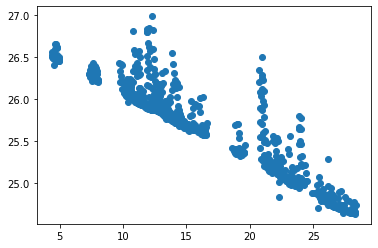

In [78]:
# plot missed, cont, wrong, right


array1 = [3, 3.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0]
array2 = [3, 3, 2, 3, 2, 2, 1, 1, 1, 3, 2]

appresult= array1
result = array2

wflag=0
cflag=1


# add arrays to be plotted 
xmissed= []
ymissed=[]
xcont =[]
ycont =[]
xwrong=[]
ywrong=[]
xright=[]
yright=[]

firstframewrong=9

alen = len(result)

applen = len(appresult)

# counter for array el
acounter = 0


for i in range(initialframe, initialframe+alen):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    
    print("acounter ", acounter)
    
    a = result[acounter]
    xarray = []
    yarray = []
    with open(name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        for row in csv_reader:
            clusterid = float(row[0])
            xpoint = float(row[1])
            ypoint = float(row[2])
            
            if clusterid == a:
                if acounter >= firstframewrong-1:
                    if wflag==1:
                        xwrong.append(xpoint)
                        ywrong.append(ypoint)
                    if cflag==1:
                        xcont.append(xpoint)
                        ycont.append(ypoint)
                else:
                    xright.append(xpoint)
                    yright.append(ypoint)
                
                
    
    acounter =acounter +1
    if acounter > alen:
        break

        # plot
plt.scatter(xright,yright)
plt.scatter(xwrong, ywrong)
plt.show()
    

In [447]:
xcont

[]

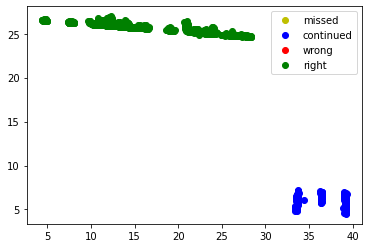

In [79]:
# plot 
pmissed, = plt.plot(xmissed, ymissed, "yo")

pcont, = plt.plot(xcont, ycont, "bo")
pwrong, = plt.plot(xwrong, ywrong, "ro")
pright, = plt.plot(xright, yright, "go")

plt.legend([pmissed, pcont, pwrong, pright], ["missed", "continued", "wrong", "right"])

plt.show()

In [519]:
#result_app= [8, 9.0, 6.0, 7.0]
#result_dist = [8, 9, 6, 7, 7, 7, 2, 2, 1, 1, 2]

#result_app= [4, 3.0, 4.0, 3.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0]
#result_dist= [4, 3, 4, 3, 3, 1, 3, 2, 2, 2, 3]

result_app= [6, 6.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
result_dist= [6, 6, 8, 6, 7, 4, 5, 4, 3, 2, 3]

initialframe=10
endframe= 20

In [521]:
firstframewrong=4

In [522]:
continuedresult = []

missedresult = [] # points missed taken from result 


contflag= 0
mflag = 0
wflag = 1

# firstframewrong = 

#result_app = result
#result_dist = listclusterids

alen = len(result_dist)


# counter for array el
acounter = 0


for i in range(initialframe, endframe):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    
    a = result_dist[acounter]
    print("a", a)
    
    xarray = []
    yarray = []
    with open(name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        for row in csv_reader:
            clusterid = float(row[0])
            xpoint = float(row[1])
            ypoint = float(row[2])
            
            if clusterid == a:
                if acounter < firstframewrong:
                    xright.append(xpoint) # xarray
                    yright.append(ypoint)
                
                if acounter >= firstframewrong:
                    #print("acounter", firstframewrong)
                    # continued
                    if contflag==1:
                        xcont.append(xpoint)
                        ycont.append(ypoint)
                    # missed
                    if mflag == 1:
                        xmissed.append(xpoint)
                        ymissed.append(ypoint)
                    if wflag==1:
                        if acounter > firstframewrong:
                            break
                        xwrong.append(xpoint)
                        ywrong.append(ypoint)    
        # plot
        #plt.scatter(xarray,yarray)
    acounter =acounter +1
    if acounter > alen:
        break

a 6
a 6
a 8
a 6
a 7
a 4
a 5
a 4
a 3
a 2


current cluster is 1


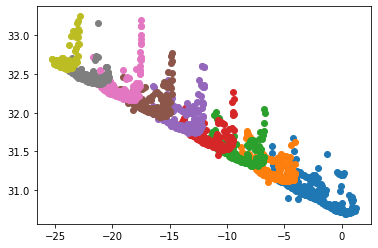

firstframewrong is: -1
current cluster is 2


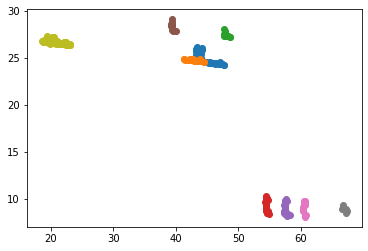

firstframewrong is: 4
continued
array1 [2, 2.0, 2.0]
array2 [2, 2, 2, 2, 2, 3, 3, 4, 3, 1]
current cluster is 3


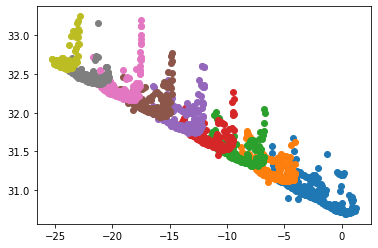

firstframewrong is: 2
wrong
array1 [3, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
array2 [3, 1, 1, 1, 1, 1, 2, 2, 2, 3]


In [190]:
# complete procedure distance 

c1 =1
c2 =3

missedmatching=0
continuedmatching=0
wrongmatching=0
clustering_error = 0
totalcomparisons = 0

initialframe = 290
endframe = 299

mx = 11
maxnumframes = endframe+1 - initialframe

for c in range(c1, c2+1):
    print("current cluster is", c)
    initialcluster = c
    # array to be plotted
    arrayx = []

    arrayy = []

    xvalues = []
    yvalues = []

    finalarray=[]
    
    finalarray.append(initialcluster)

    totxvalues = defaultdict(list)
    totyvalues = defaultdict(list)
    # initialize distances map 
    mapdistances = defaultdict(list)

    obnum =0

    currentdistances = []
    
    listclusterids=[]

    for j in range(0, mx):
        mapdistances[j]=[]
        totxvalues[j] = []
        totyvalues[j] = []


    for i in range(initialframe, endframe+1): # must iterate over endframe
        name = "file_out"
        name = name+str(i)
        name = name+".csv"
        firstrow=0
        # clear map
        for j in range(0, mx):
            mapdistances[j] =[]
            totxvalues[j] =[]
            totyvalues[j]=[]

        with open(name) as csv_file:
            m = 1000

            f =0 
            # reset hxvalues , hyvalues
            hxvalues = []
            hyvalues=[]

            currentmap= {}

            csv_reader = csv.reader(csv_file, delimiter=",")

            if i==initialframe:
                #print("i",i)
                for row in csv_reader:

                    clusterid = float(row[0])

                    #print("clusterid", clusterid)
                    if clusterid==initialcluster:
                        xpoint = float(row[1])
                        ypoint = float(row[2])
                        arrayx.append(xpoint)
                        arrayy.append(ypoint)

                # find average 
                avx = np.mean(arrayx)
                avy = np.mean(arrayy)
                avprev = [avx, avy ]
                
                #plt.scatter(arrayx, arrayy)

                continue

            for row in csv_reader:
                clusterid = float(row[0]) # current cluster id 

                if clusterid != obnum:
                    numo1 = float(obnum)
                    mapdistances[numo1] = currentdistances
                    totxvalues[numo1] = xvalues
                    totyvalues[numo1] = yvalues
                    # new comparisons 
                    obnum = clusterid

                    currentdistances=[]
                    #currentmap= {}

                    xvalues =[]
                    yvalues =[]

                    continue
                xpoint = float(row[1])
                ypoint = float(row[2])
                xvalues.append(xpoint) # save to array 
                yvalues.append(ypoint)
                # calc distance
                dx1 = avx - xpoint
                dy1 = avy - ypoint
                d1 = pow(dx1, 2) + pow(dy1, 2)
                dist = pow(d1, 0.5)
                currentdistances.append(dist) 

            for j in range(0, mx):
                meandistances = np.mean(mapdistances[j])
                if meandistances < m:
                    m = meandistances
                    ky = j 
            finalarray.append(ky)
            hxvalues = totxvalues[ky]
            hyvalues = totyvalues[ky]

            avx = np.mean(hxvalues)
            avy = np.mean(hyvalues)

            plt.scatter(hxvalues, hyvalues)

            # print mean
            #print("mean x,",np.mean(hxvalues))
            #print("mean y,",np.mean(hyvalues))

            # reset hxvalues and hyvalues (don't need )
            hxvalues =[]
            hyvalues =[]

    plt.show()
    
    
    listclusterids =finalarray
    # app 

    currentframe = initialframe

    #initialcluster 

    result = []
    result.append(initialcluster)
    
    iframe = initialframe
    currentcluster = initialcluster
    t =True
    while t:
        nextres = findnextclusterapp(iframe, currentcluster)
        if str(nextres) == "nan":
            break
        if iframe >= endframe:
            break
        result.append(nextres)
        iframe = iframe+1
        currentcluster = nextres

    #print("array1 result is,", result)
    
    len1 = len(result) #datastore result
    len2 = len(listclusterids) # our result 

    setlen = min(len1, len2)

    #removemissed= 0
    #removecontinued =0 
    #contmatching = 1
    
    od1 = {}
    od2 = {}
    booleanwrong=[]
    
    
    for j1 in range(0,setlen):
        nolongerwrong=0
        nolongerwrongoriginal = 0
        frameno=initialframe+j1
        od1[frameno]=[result[j1]]
        od2[frameno]=[listclusterids[j1]]
        if result[j1]==listclusterids[j1]:
            nolongerwrong=1
            nolongerwrongoriginal = 1
        if result[j1]!= listclusterids[j1]:
            v1 = errorclusters.get(frameno)
            if v1!=None:
                errorarray= errorclusters[frameno]
                for el in errorarray:
                    if result[j1] in el:
                        if listclusterids[j1] in el:
                            nolongerwrong=1
        if nolongerwrong!=1:
            booleanwrong.append(1) # wrong
        else:
            booleanwrong.append(0) # not wrong
            if nolongerwrongoriginal ==0:
                clustering_error=clustering_error+1
    maxlen= max(len1, len2)
    last1 = result[setlen-1]
    last2 = listclusterids[setlen-1]
    
    if len1 != len2:
# iterate over setlen to max len
        for j2 in range(setlen, maxlen):
            nolongerwrong=0
            nolongerwrongoriginal=0
            frameno2 = initialframe+j2

            if len1 > len2:
                # look up
                next2 = findnextclusterdist(frameno2, last2)
                
                if next2 == result[j2]:
                    nolongerwrong=1
                    nolongerwrongoriginal=1
                    #booleanwrong.append(0)
                # check error clusters
                v2 = errorclusters.get(frameno2)
                #print("v2", v2)
                if v2 != None:
                    errorarray = errorclusters[frameno2]
                    for el in errorarray:
                        if result[j2] in el:
                            if next2 in el:
                                nolongerwrong=1
                if nolongerwrong==1:
                    booleanwrong.append(0) # not wrong
                    if nolongerwrongoriginal==0:
                        clustering_error=clustering_error+1
                else:
                    booleanwrong.append(1) # wrong

                last2 = next2
                # look up 

            if len2 > len1:
                next2 = findnextclusterapp(frameno2, last2)
                if next2 == listclusterids[j2]:
                    nolongerwrong=1
                    nolongerwrongoriginal=1
                v2 = errorclusters.get(frameno2)
                if v2 != None:
                    errorarray = errorclusters[frameno2]
                    for el in errorarray:
                        if listclusterids[j2] in el:
                            if next2 in el:
                                nolongerwrong=1
                if nolongerwrong==1:
                    booleanwrong.append(0)
                    if nolongerwrongoriginal==0:
                        clustering_error=clustering_error+1
                else:
                    booleanwrong.append(1) # wrong
                last2 = next2
    d1 = {}
    d2 = {}
    
    for j1 in range(0, setlen):
        frameno = initialframe+j1
        # check similar clusters
        clusters1 = od1[frameno]
        clusters2 = od2[frameno]

        simclusters = errorclusters.get(frameno)
        if simclusters != None:
            simarray = errorclusters[frameno]
            # check if matches
            for el in simarray:
                if od1[frameno] in el:
                    clusters1.extend(el)
                if od2[frameno] in el:
                    clusters2.extend(el)
        d1[frameno] = clusters1
        d2[frameno] = clusters2

    # add empty entries for range setlen to maxlen   
    maxlen= max(len1, len2)
    # set original clusters for up to maxlen
    for j2 in range(setlen, maxlen):
        frameno = initialframe+j2
        d1[frameno] = []
        d2[frameno] = []
        if len1>len2:
            d1[frameno]= [result[j2]]
        if len2>len1:
            d2[frameno]=[listclusterids[j2]]

    d1[initialframe+maxlen] = []
    d2[initialframe+maxlen] = []
    
    # evaluation 3
    
    setlen = min(len1, len2)
    maxlen= max(len1,len2)
# look for wrong matching

    for j in range(0, maxlen):

        frameno = initialframe+j 
        #print("j is", j)
        #print("frame num is", frameno)

        # all clusters within current frame
        clust1 = d1[frameno]
        clust2 = d2[frameno]


        # check clusters to next step
        for c1 in clust1:
            nc1 = findnextclusterapp(frameno, c1)
            if str(nc1) == "nan":
                #print("nc1 is nan")
                continue
            #print("frameno plus one", frameno+1)
            #print("nc1", nc1)
            nclust1 = d1[frameno+1]
            # only append if not already there
            if nc1 not in nclust1:
                nclust1.append(nc1)
            #nclust1.append(nc1)
            #nclust1 = np.unique(nclust1)
            d1[frameno+1] = nclust1

        for c2 in clust2:
            #print("frame", frameno)
            #print("clust", c2)
            nc2 = findnextclusterdist(frameno, c2)
            if nc2 == -1:
                continue
            nclust2 = d2[frameno+1]
            if nc2 not in nclust2:
                nclust2.append(nc2)
            d2[frameno+1] = nclust2

        if booleanwrong[j] == 1: # look for wrong
            # look for matching id from both arrays
            #print("clust1,", clust1)
            #print("clust2", clust2)
            set1 = set(clust1)
            intersect= set1.intersection(clust2)
            if len(intersect) >0:
                print("intersect")
                booleanwrong[j]=0 
                # increment clustering error
                clustering_error = clustering_error+1

    # last step: find first frame where it is wrong:
    #if is last element of array1 -> continued
    #if is last element of array2 -> missed
    # else: wrong 
    bindex = 1
    firstframewrong = -1
    for b in booleanwrong:
        if b == 1:
            firstframewrong = bindex
            break
        bindex= bindex+1

    if firstframewrong == -1:
        totalcomparisons= totalcomparisons+maxlen
    else:
        totalcomparisons= totalcomparisons+firstframewrong
        
    contflag = 0
    missedflag= 0
    
    print("firstframewrong is:", firstframewrong)
    
    if np.sum(booleanwrong) >0:
        if firstframewrong>len1:
            print("continued")
            print("array1", result)
            print("array2", listclusterids)
            contflag= 1
            continuedmatching= continuedmatching+1
        if firstframewrong > len2: 
            print("missed")
            print("array1", result)
            print("array2", listclusterids)
            missedmatching = missedmatching+1
            missedflag=1
        if contflag==0 and missedflag==0:
            print("wrong")
            print("array1", result)
            print("array2", listclusterids)
            wrongmatching= wrongmatching+1
        
        if contflag==1 and missedflag==1:
            print("BOTH CONTINUED AND MISSED")
    

In [195]:
print("total", totalcomparisons)

print("missed", missedmatching)
print("continued", continuedmatching)
print("wrong", wrongmatching)
print("clustering err", clustering_error)

total 16
missed 0
continued 1
wrong 1
clustering err 1


In [189]:
initialframe

280

In [177]:
import csv
import numpy as np
import matplotlib.pyplot as plt

minus 1 wrong at init_cluster 3



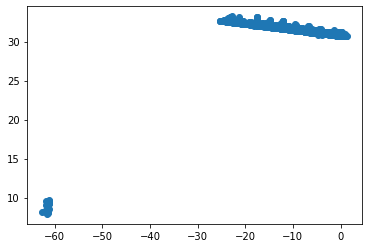

In [194]:
# plot other clusters
#array1= [3, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
array2= [3, 1, 1, 1, 1, 1, 2, 2, 2, 3]

result=array1
result2= array2

alen = len(result)
alen2 = len(result2)


acounter=0
# counter for array el

xv1 =[]
yv1=[]
xv2 = []
yv2 = []

for i in range(initialframe, initialframe+alen):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    
    
    a = result[acounter]
    xarray = []
    yarray = []
    with open(name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        for row in csv_reader:
            clusterid = float(row[0])
            xpoint = float(row[1])
            ypoint = float(row[2])
            
            if clusterid == a:
                xarray.append(xpoint)
                yarray.append(ypoint)
                
                
        # plot
        xv1.extend(xarray)
        yv1.extend(yarray)
        #plt.scatter(xarray,yarray)
    
    acounter =acounter +1
    if acounter > alen:
        break

acounter=0
for i in range(initialframe, initialframe+alen2):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"

    
    a = result2[acounter]
    xarray = []
    yarray = []
    with open(name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        for row in csv_reader:
            clusterid = float(row[0])
            xpoint = float(row[1])
            ypoint = float(row[2])
            
            if clusterid == a:
                xarray.append(xpoint)
                yarray.append(ypoint)
                
                
        # plot
        xv2.extend(xarray)
        yv2.extend(yarray)
        #plt.scatter(xarray,yarray)
    
    acounter =acounter +1
    if acounter > alen2:
        break

#plt.scatter(xv2, yv2)
#plt.scatter(xv1, yv1)
plt.scatter(xv2, yv2)
plt.show()



    

In [441]:
findnextclusterapp(31, 9)

6.0

In [ ]:
array1 [8, 9.0, 6.0, 7.0]
array2 [8, 9, 6, 7, 7, 7, 2, 2, 1, 1, 2]

array1 result is, [11, 12.0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [357]:
findnextclusterapp(11,3)

4.0

In [404]:
wrongmatching

6

In [406]:
clustering_error

0

In [405]:
continuedmatching

5

In [407]:
totalcomparisons

48

In [589]:
# print statements
print("missed:", missedmatching)
print("continued:", continuedmatching)
print("wrong ", wrongmatching)

print("Clustering error ", clustering_error)
print("tot.", totalcomparisons)

missed: 0
continued: 5
wrong  4
Clustering error  4
tot. 45


In [488]:
errorclusters

{6: [[4, 5]],
 7: [[5, 6]],
 14: [[5, 7]],
 15: [[2, 3]],
 16: [[3, 4, 5]],
 17: [[2, 3, 4]],
 18: [[2, 3]],
 20: [[2, 3]],
 22: [[3, 4]],
 23: [[2, 3, 4]],
 24: [[2, 4, 3]],
 25: [[2, 3, 5]],
 26: [[2, 4, 5]],
 27: [[4, 5]],
 28: [[2, 4]],
 29: [[2, 3]],
 30: [[2, 3], [7, 9]],
 34: [[4, 5]],
 35: [[5, 6], [3, 10, 11]],
 36: [[5, 6]],
 38: [[5, 6, 7], [8, 9, 10]],
 39: [[6, 7], [10, 11]],
 41: [[5, 6], [1, 2], [8, 11, 12]],
 43: [[8, 11]],
 44: [[1, 7], [10, 11]],
 45: [[8, 7], [11, 12]],
 46: [[5, 6]],
 47: [[2, 3]],
 48: [[5, 6]],
 51: [[1, 2]],
 52: [[1, 2]],
 54: [[1, 2]],
 56: [[1, 2]],
 57: [[1, 2]],
 58: [[1, 2]],
 59: [[1, 2]],
 60: [[1, 2]],
 61: [[1, 2]],
 62: [[1, 2]],
 63: [[1, 2]],
 66: [[1, 2], [5, 6]],
 70: [[4, 5]],
 71: [[1, 3]],
 74: [[2, 3]],
 78: [[1, 6], [10, 11], [7, 8]],
 79: [[1, 2], [6, 7]],
 91: [[8, 10]],
 97: [[2, 3]],
 99: [[3, 5]],
 100: [[1, 4]],
 102: [[7, 8, 9]],
 103: [[2, 3]],
 114: [[4, 5]],
 115: [[1, 2]],
 118: [[1, 2]],
 119: [[1, 2]],
 123: [[1, 

In [345]:
str(findnextclusterapp(13, 1)) =="nan"

False

In [361]:
# correct way to find array

currentframe = initialframe

#initialcluster 
initialcluster=2
result = []
result.append(initialcluster)

prevmatched = initialcluster

boolean = 1 # if there is still a next match 

rownum = 0

with open(datastorename) as datastore_csv_file:
    datastore_csv_reader = csv.reader(datastore_csv_file, delimiter=",")

    for row in datastore_csv_reader:
        rownum =rownum+1

        # 1 - frame 
        framenum = float(row[0])

        # 2 - cluster id
        clusterid = float(row[1])
        matched = float(row[18]) 

        #print("matched", matched)
        #print("row ", rownum)
        
        # if past end frame
        if framenum > endframe:
            break

        if framenum < initialframe:
            continue


        if framenum != currentframe:
            if boolean == 0:
                #print("bool break")
                #print("row,", rownum)

                break # no more next match

            # append to matched
            #print("row num,", rownum)
            if str(nextmatched) == "nan":
                print("nan")
                #break
            
            result.append(nextmatched)

            prevmatched = nextmatched

            boolean = 0

            currentframe = framenum

        #print("frame num", framenum)





        if clusterid == prevmatched:
            nextmatched = matched
            boolean = 1 # found the next match


nan


In [379]:
initialcluster=6

In [382]:
result=[]
result.append(initialcluster)
iframe = initialframe
currentcluster = initialcluster
t =True
while t:
    nextres = findnextclusterapp(iframe, currentcluster)
    if str(nextres) == "nan":
        break
    if iframe >= endframe:
        break
    result.append(nextres)
    iframe = iframe+1
    currentcluster = nextres


In [383]:
result

[6, 6.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]

In [362]:
result

[2, nan]

In [333]:
findnextclusterapp(3,1)

1.0

In [ ]:
similarclusters = errorclusters.get(initialframe+ setlen) 
if similarclusters != None:
    errorarray = errorclusters[initialframe + setlen]
    for e in errorarray:
        if e == listclusterids[initpluslen1+1]:
            print("undo missed matching")
            missedmatching = missedmatching-1
            # add to error of clustering
            clustering_error = clustering_error+1
            break # only need one match 

In [29]:
for i in range(0, 7):
    print(i+10)
    if i == 3:
        print(i)
        break
            

10
11
12
13
3


In [241]:
findnextclusterdist(1, 7)

avx nan
meandist nan
meandist nan
meandist nan
meandist nan
meandist nan
meandist nan
meandist nan
meandist nan
meandist nan
meandist nan
meandist nan


-1

In [237]:
mx

11

In [6]:
# distance based next cluster 
def findnextclusterdist(iframe, el):
    ky = -1
    name = "file_out"
    name = name+str(iframe)
    name1 = name+".csv"
    name2 = "file_out"+str(iframe+1)+".csv"
    
    arrayx = []
    arrayy = []
    xvalues = []
    yvalues =[]
    m = 1000
    
    with open(name1) as csv_file:
        f =0 
        # reset hxvalues , hyvalues
        hxvalues = []
        hyvalues=[]

        countmap= {}

        csv_reader = csv.reader(csv_file, delimiter=",")

        for row in csv_reader:
            clusterid = float(row[0])
            if clusterid == el:
                xpoint = float(row[1])
                ypoint = float(row[2])
                arrayx.append(xpoint)
                arrayy.append(ypoint)
        avx = np.mean(arrayx)
        avy = np.mean(arrayy)
        #print("avx", avx)
        avprev = [avx, avy ]
    
    obnum = 1
    currentdistances =[]
    mapdistances = defaultdict(list)
    
    with open(name2) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")

        for row in csv_reader:
            clusterid = float(row[0])
            
            if clusterid != obnum:
                numo1 = float(obnum)
                mapdistances[numo1] = currentdistances
                
                # new comparisons 
                obnum = clusterid
                
                currentdistances=[]
                #currentmap= {}
                
                xvalues =[]
                yvalues =[]
                
                continue
            
            xpoint = float(row[1])
            ypoint = float(row[2])
            xvalues.append(xpoint) # save to array 
            yvalues.append(ypoint)
            # calc distance
            dx1 = avx - xpoint
            dy1 = avy - ypoint
            d1 = pow(dx1, 2) + pow(dy1, 2)
            dist = pow(d1, 0.5)
            currentdistances.append(dist) 
        for j in range(0, mx):
            meandistances = np.mean(mapdistances[j])
            if meandistances < m:
                #print("meandist", meandistances)
                m = meandistances
                ky = j 
    return ky

In [3]:
# load errorclusters
# pre processing step: load lidar_similarlabeledclusters.csv
import csv
# dictionary mapping framenumber to array of clusterids
errorclusters = {}

firstrow =0


#lidarsim = 'lidar_similarlabeledclusters.csv'
lidarsim = 'lidar_similarlabeledclusters_v2.csv'
with open(lidarsim) as lidarsim_csv_file:
    sim_csv_reader = csv.reader(lidarsim_csv_file, delimiter=",")
    for row in sim_csv_reader:
        # skip header row
        if firstrow==0:
            firstrow=1
            continue
        framenumber = int(row[0])
        arr = []
        cluster1 = row[1]
        cluster2 = row[2]
        cluster3 = row[3]
        arr.append(int(cluster1))
        if len(cluster2) > 0:
            arr.append(int(cluster2))
        if len(cluster3) >0:
            arr.append(int(cluster3))
        #print(row)
        errorcode = int(row[4])
        if errorcode == 1:
            # add to dictionary
            #print("add")
            v = errorclusters.get(framenumber)
            if v==None:
                errorclusters[framenumber] = [arr]
            else:
            # append additional array
                a = errorclusters[framenumber]
                alen = len(a)
                em = []
                for i in range(0, alen):
                    em.append(a[i])
                em.append(arr)
                
                errorclusters[framenumber] = em
            

In [80]:
v = errorclusters.get(8)

In [81]:
v == None

True

In [4]:
errorclusters

{6: [[4, 5]],
 7: [[5, 6]],
 14: [[5, 7]],
 15: [[2, 3]],
 16: [[3, 4, 5]],
 17: [[2, 3, 4]],
 18: [[2, 3]],
 20: [[2, 3]],
 22: [[3, 4]],
 23: [[2, 3, 4]],
 24: [[2, 4, 3]],
 25: [[2, 3, 5]],
 26: [[2, 4, 5]],
 27: [[4, 5]],
 28: [[2, 4]],
 29: [[2, 3]],
 30: [[2, 3], [7, 9]],
 34: [[4, 5]],
 35: [[5, 6], [3, 10, 11]],
 36: [[5, 6]],
 38: [[5, 6, 7], [8, 9, 10]],
 39: [[6, 7], [10, 11]],
 41: [[5, 6], [1, 2], [8, 11, 12]],
 43: [[8, 11]],
 44: [[1, 7], [10, 11]],
 45: [[8, 7], [11, 12]],
 46: [[5, 6]],
 47: [[2, 3]],
 48: [[5, 6]],
 51: [[1, 2]],
 52: [[1, 2]],
 54: [[1, 2]],
 56: [[1, 2]],
 57: [[1, 2]],
 58: [[1, 2]],
 59: [[1, 2]],
 60: [[1, 2]],
 61: [[1, 2]],
 62: [[1, 2]],
 63: [[1, 2]],
 66: [[1, 2], [5, 6]],
 70: [[4, 5]],
 71: [[1, 3]],
 74: [[2, 3]],
 78: [[1, 6], [10, 11], [7, 8]],
 79: [[1, 2], [6, 7]],
 91: [[8, 10]],
 97: [[2, 3]],
 99: [[3, 5]],
 100: [[1, 4]],
 102: [[7, 8, 9]],
 103: [[2, 3]],
 114: [[4, 5]],
 115: [[1, 2]],
 118: [[1, 2]],
 119: [[1, 2]],
 123: [[1, 

In [100]:
ec = errorclusters[30]
elen= len(ec)
for i in range(0, elen):
    print(ec[i])

[2, 3]
[7, 9]


In [96]:
len(errorclusters[30])

2

In [98]:
len(errorclusters[78])

3

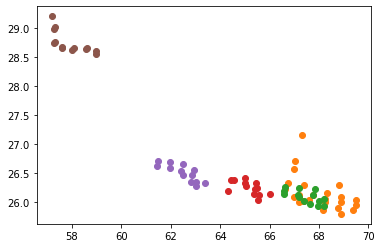

In [295]:
result = [7, 6, 7, 6,7,5]
alen = len(result)

initialframe=1
endframe = 6

# counter for array el
acounter = 0

for i in range(initialframe, endframe+1):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    
    a = result[acounter]
    xarray = []
    yarray = []
    with open(name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        for row in csv_reader:
            clusterid = float(row[0])
            xpoint = float(row[1])
            ypoint = float(row[2])
            
            if clusterid == a:
                xarray.append(xpoint)
                yarray.append(ypoint)
                
                
        # plot
        plt.scatter(xarray,yarray)
    
    acounter =acounter +1
    if acounter > alen:
        break

plt.show()


In [300]:
trajfile

NameError: name 'trajfile' is not defined

In [ ]:
# place KF code in same nb as distance based method

In [94]:
# KF step 1

# PART B STEP 2 
# determine initial pos and velocity

#  (1) determine average speed
# determine based on traj file

# (2) determine average x velocity and y velocity (break into sep components)
#tfile ="april2019/2019-02-27-12-19-36_Velodyne-HDL-32-Data-BF1-CL1-Traj.csv"

trajfile = "2019-9-10-12-0-0-BF1-CL1-Traj(0-18000frames).csv"

#tfile =  "2019-9-10-12-0-0-BF1-CL1-Traj(0-18000frames).csv"


import math
import csv

trajnum = 0
obnum=1
irow=0
settimestamp=[]
setx = []
sety = []
every5 = 0

arrayvel=[]
arrayvelx =[]
arrayvely=[]

with open(trajfile) as csv_file:
    csv_reader= csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count ==0:
            line_count=1
            continue
        if line_count==1:
            line_count=2
            prevrow = row
            prevx = float(row[6])
            prevy = float(row[7])
            pts = float(row[2])*0.000001
        xval = float(row[6])
        yval = float(row[7])
        trajnum = float(row[0])
        timestamp = float(row[2])
        ts = timestamp*0.000001
        # test for 0 timestamp
        if timestamp==0:
            prevx = xval
            prevy = yval
            pts = 0
            continue
        if pts ==0:
            pts = ts
            prevx = xval
            prevy = yval
            continue
        every5 = every5+1
        if every5 == 1:
            pts = ts
            prevx = xval
            prevy = yval 
            
        if every5 == 5:
            diff = ts - pts
            if diff==0:
                continue
            xdist = xval - prevx
            ydist = yval - prevy
            xdist2 = pow(xdist, 2)
            ydist2 = pow(ydist, 2)
            dist = pow(xdist2+ydist2, 0.5)
            v = dist/float(diff)
            vx = xdist/float(diff)
            vy = ydist/float(diff)
            if dist!=0:
                arrayvel.append(v)
                arrayvelx.append(vx)
                arrayvely.append(vy)
            every5= 0
        else:
            continue
        if trajnum != obnum:
            prevx = xval
            prevy = yval
            pts =ts
            obnum = trajnum

    
        
            

In [95]:
#KF step 2

# set values of init. velocity
import numpy as np
avx= np.mean(arrayvelx)
avy= np.mean(arrayvely)



In [4]:
avx

4.672467021913508

In [96]:
# KF step 3

# determine initial position based on init. cluster and frame

initialcluster = 1
initialframe= 1

firstrow = 0
pathname = "file_out"+str(initialframe)+".csv"

arrayx = []
arrayy = []

with open(pathname) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    for row in csv_reader:
        if firstrow==0:
            firstrow=1
            continue
        clusterid = float(row[0])
        if clusterid == initialcluster:
            xpoint = float(row[1])
            ypoint = float(row[2])
            arrayx.append(xpoint)
            arrayy.append(ypoint)
            
# initial position
px0 = np.mean(arrayx)
py0 = np.mean(arrayy)
            
    


In [167]:
velx

3.8257724137931035

In [98]:
# KF step 4

# combine the measurements and the kalman filter
# average the previous cluster for single pt 
# measure the min dist from cluster
from numpy import array

dt = 1
# p_x, p_y, v_x, v_y
x1 = array(([[px0], [py0], [avx], [avy]])) 

# extra change p_x, extra change p_y, change v_x, change v_y 
u = array(([[4.0], [12.0], [0], [0]]))

P = array([[10, 0, 0 , 0], [0, 10, 0, 0], [0, 0, 100, 0], [0, 0, 0, 100]])

F = array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])

#H = array([[1,0,0,0], [0,1,0,0], [0,0,0,0], [0,0,0,0]])
H = array([[1,0,0,0], [0,1,0,0]])
           
# meas noise
R = array([[0.1,0], [0,0.1]])

B = np.eye(4)

Q = np.eye(4)

In [99]:
# KF step 5

from numpy.linalg import inv
def predict1(x, P):
    x = np.dot(F, x) + np.dot(B, u)
    P = np.dot(F, np.dot(P, F.transpose())) + Q
    return x, P

def update1(x, P, z):
    y = z - np.dot(H,x)
    S = np.dot(H, np.dot(P, H.transpose()))
    K = np.dot(P, np.dot(H.transpose(), inv(S)))
    #print("k",K)
    #print("y", y)
    x = x+ np.dot(K,y)
    P = P - np.dot(K, np.dot(H, P))
    xs.append(x)
    cov.append(P)
    return x, P

def update2(x, P,z):
    S = np.dot(np.dot(H, P), H.transpose()) + R
    K = np.dot(np.dot(P, H.transpose()), inv(S))
    z = matrix([z])
    y = z.transpose() - np.dot(H, x)
    x = x + np.dot(K, y)
    P = P - np.dot(np.dot(K,H), P)
    return x, P

In [101]:
# KF step 6

from numpy import *

In [155]:
avx = avx/10
avy= avy/10


In [169]:
avx

4.327459609120521

In [168]:
vely

2.87226551724138

start point x -4.645113815789474
start point y 31.298769736842104
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]

x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586

x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 ]
 [46.17103525]
 [ 3.82577241]
 [ 2.87226552]]
x1[0] [3.1806586]
x1 [[ 3.1806586 

x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]

x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.5

x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]

x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]
 [-2.39480703]
 [-5.58215125]]
x1[0] [[-5.59436145]]
x1 [[-5.59436145]
 [38.48109104]

 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]

 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]

x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]

x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]

x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]

x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]

x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]
x1[0] [[-11.84704108]]
x1 [[-11.84704108]
 [ 34.62748728]
 [ -5.33927615]
 [ -9.43102693]]

x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]

x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]

x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]

 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]

x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]

x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]

x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]
x1 [[-15.27214761]
 [ 33.22194707]
 [ -6.12086978]
 [-10.92033991]]
x1[0] [[-15.27214761]]

x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]

x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]

 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]

x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]

x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]

 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]

x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]

x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]
x1 [[-20.37189576]
 [ 32.88029786]
 [ -7.23710261]
 [-11.45292697]]
x1[0] [[-20.37189576]]

x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]

 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]

x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]

x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]
x1 [[-21.75939907]
 [ 32.93109843]
 [ -6.5440285 ]
 [-11.63888811]]
x1[0] [[-21.75939907]]

x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]

 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]

x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]

x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]

 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]

x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]
x1[0] [[-24.74716275]]
x1 [[-24.74716275]
 [ 33.14623301]
 [ -6.71030309]
 [-11.69358812]]

x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13

x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.5

x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.5

x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13

x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.56262487]
 [  0.48708679]
 [  8.66057355]
 [-24.04630403]]
x1[0] [[13.56262487]]
x1 [[ 13.5

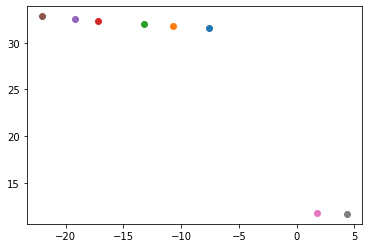

In [165]:
# KF step 7  (one cluster)

### input parameters
initialframe = 1
n = 10 # ending frame 
 
initialcluster = 2

###
from collections import defaultdict

import matplotlib.pyplot as plt
import csv

velx= avx/10
vely=avy/10



# array to be plotted
arrayx = []

arrayy = []
# set tarray values as the frame number to track the evolution
tarray = []


# parameters of step 5

firstrow=0

firstrowfirstfile= 0

obnum =2 

previndices=[]

currentindices=[]

totalmap = {}

arrayofarrays = []

# rename current dict to totaldict?
currentdict = {}

arrayofdicts=[]

finalarray=[]

xvalues = []
yvalues = []

hxvalues =[]
hyvalues= []

prevmap={}



# must intialize matchfreq
mf = defaultdict(list)

mx = 11

for j in range(0, mx):
    mf[j]=0 

matchfreq= mf



# initialize distances map 
mapdistances = defaultdict(list)

totxvalues = defaultdict(list)
totyvalues = defaultdict(list)


currentcluster = 0
clusters = defaultdict(list)

f = 1000 # default value

for j in range(0, mx):
    mapdistances[j]=[]
    totxvalues[j] = []
    totyvalues[j] = []
    clusters[j] = []

currentdistances = []


outputclusters = []
outputclusters.append(initialcluster)

    
pathname = "file_out"+str(initialframe)+".csv"
firstrow=0
    
xvalues1= []
yvalues1 = []

with open(pathname) as csv_file:
    m = f
    currentmap={}
    csv_reader = csv.reader(csv_file, delimiter=",")

    for row in csv_reader:
        # don't skip first row
        clusterid = float(row[0])
        xpoint = float(row[1])
        ypoint = float(row[2])
        if clusterid == initialcluster:
            xvalues1.append(xpoint)
            yvalues1.append(ypoint)
# find x1 based on icluster 
avx1 = np.mean(xvalues1)
avy1 = np.mean(yvalues1)

print("start point x", avx1)
print("start point y", avy1)

x1 = array(([[avx1], [avy1], [velx], [vely]])) 


for i in range(initialframe+1, n): # not need to process initial frame
    pathname = "file_out"+str(i)+".csv"
    firstrow=0
    for j in range(0, mx):
        mapdistances[j]= []
        totxvalues[j]= []
        totyvalues[j]= []
        clusters[j] = []
    # predict
    x1, P = predict1(x1, P)
    
    with open(pathname) as csv_file:
        m = f
        currentmap={}
        csv_reader = csv.reader(csv_file, delimiter=",")
        
        for row in csv_reader:
            # don't skip first row
            clusterid = float(row[0])
            
            if clusterid != obnum:
                numo1 = float(obnum)
                mapdistances[numo1] = currentdistances
                totxvalues[numo1] = xvalues
                totyvalues[numo1] = yvalues
                clusters[numo1] = currentcluster
                obnum = clusterid
                currentdistances=[]
                xvalues=[]
                yvalues=[]
                continue
            
            xpoint = float(row[1])
            ypoint = float(row[2])
            xvalues.append(xpoint)
            yvalues.append(ypoint)
            currentcluster = clusterid
            
            print("x1", x1)
            print("x1[0]", x1[0])
            
            # distance from predicted point x1
            dx1 = x1[0] - xpoint
            dy1 = x1[1] - ypoint
            d1 = pow(dx1,2)+pow(dy1,2)
            dist = math.sqrt(d1)
            # save
            currentdistances.append(dist)
        # find min
        for j in range(0, mx):
            meandistances = np.mean(mapdistances[j])
            if meandistances <m:
                m = meandistances
                ky =j
                print("cluster", clusters[ky])
                
        outputclusters.append(clusters[ky])
        hxvalues = totxvalues[ky]
        hyvalues = totyvalues[ky]
        
        avx = np.mean(hxvalues)
        avy = np.mean(hyvalues)
        
        #print("avx is", avx)
        #print("avy is", avy)
        
        # measurement, update
        z1 = [avx, avy]
        
        x1, P = update2(x1, P, z1)
        
        #plt.scatter(hxvalues, hyvalues)
        plt.scatter(avx, avy)
        hxvalues=[]
        hyvalues=[]
plt.show()
            
            
        


In [164]:
outputclusters

[5, 6.0, 6.0, 5.0, 6.0, 4.0, 4.0, 2.0, 2.0]

In [166]:
outputclusters

[2, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 1.0, 1.0]

In [147]:
outputclusters

[5, 6.0, 6.0, 5.0, 7.0, 5.0, 6.0, 4.0, 2.0]

In [143]:
outputclusters

[5, 6.0, 6.0, 6.0, 7.0, 5.0, 6.0, 4.0, 2.0]

In [139]:
outputclusters

[1, 5.0, 6.0, 6.0, 7.0, 5.0, 6.0, 4.0, 2.0]

In [141]:
outputclusters

[2, 4.0, 6.0, 6.0, 7.0, 5.0, 6.0, 4.0, 2.0]

In [92]:
findnextclusterKF(4,5)

NameError: name 'predict1' is not defined

In [121]:
# KF step 8 

from numpy import array
# need another find next cluster function
def findnextclusterKF(iframe, icluster):
    # average velocity
    velx = avx
    vely = avy
    xvalues1 = []
    yvalues1 = []
    pathname = "file_out"+str(iframe)+".csv"
    firstrow=0
    
    with open(pathname) as csv_file:
        m = f
        currentmap={}
        csv_reader = csv.reader(csv_file, delimiter=",")
        
        for row in csv_reader:
            # don't skip first row
            clusterid = float(row[0])
            xpoint = float(row[1])
            ypoint = float(row[2])
            if clusterid == icluster:
                xvalues1.append(xpoint)
                yvalues1.append(ypoint)
    # find x1 based on icluster 
    avx1 = np.mean(xvalues1)
    avy1 = np.mean(yvalues1)
    
    x1 = x1 = array(([[avx1], [avy1], [velx], [vely]])) 
    x1, P = predict1(x1, P)
    
    pathname2 = "file_out"+str(iframe+1)+".csv"
    with open(pathname) as csv_file:
        m = f
        currentmap={}
        csv_reader = csv.reader(csv_file, delimiter=",")
        
        obnum = 1
        for row in csv_reader:
            clusterid = float(row[0])
            
            if clusterid != obnum:
                numo1 = float(obnum)
                mapdistances[numo1] = currentdistances
                totxvalues[numo1] = xvalues
                totyvalues[numo1] = yvalues
                clusters[numo1] = currentcluster
                obnum = clusterid
                currentdistances=[]
                xvalues=[]
                yvalues=[]
                continue
            
            xpoint = float(row[1])
            ypoint = float(row[2])
            xvalues.append(xpoint)
            yvalues.append(ypoint)
            currentcluster = clusterid
            
            # distance from predicted point x1
            dx1 = x1[0] - xpoint
            dy1 = x1[1] - ypoint
            d1 = pow(dx1,2)+pow(dy1,2)
            dist = math.sqrt(d1)
            # save
            currentdistances.append(dist)
        # find min 
        for j in range(0, mx):
            meandistances = np.mean(mapdistances[j])
            if meandistances <m:
                m = meandistances
                ky =j
        return clusters[ky]
    
    
    

x1 [[ 2.71794886]
 [10.54439773]
 [38.25772414]
 [28.72265517]]


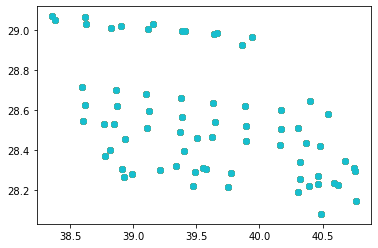

intersect
nc1 is nan
intersect
continued
array1 [1, 1.0, 1.0]
array2 [1, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
x1 [[-6.46431563]
 [16.65754688]
 [38.25772414]
 [28.72265517]]


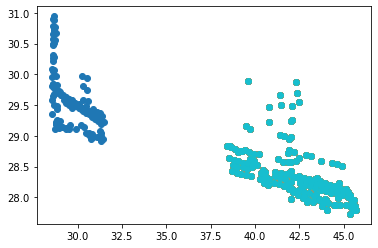

intersect
intersect
intersect
intersect
nc1 is nan
wrong
array1 [2, 3.0, 4.0, 3.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0]
array2 [2, 4.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
x1 [[20.03023621]
 [30.14779655]
 [38.25772414]
 [28.72265517]]


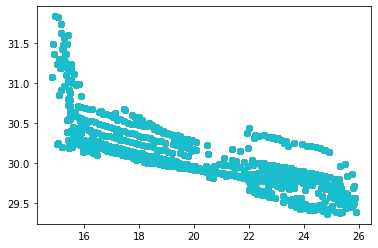

intersect
intersect
nc1 is nan
intersect
continued
array1 [3, 2.0, 3.0, 1.0, 1.0]
array2 [3, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
x1 [[31.03577848]
 [29.30731646]
 [38.25772414]
 [28.72265517]]


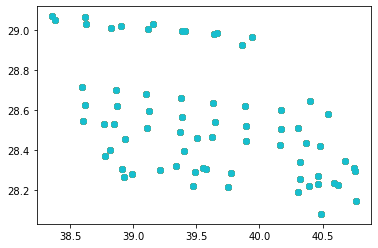

intersect
intersect
intersect
intersect
intersect
intersect
intersect
intersect
nc1 is nan
wrong
array1 [4, 3.0, 4.0, 3.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0]
array2 [4, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
x1 [[79.1972381 ]
 [ 9.50960476]
 [38.25772414]
 [28.72265517]]


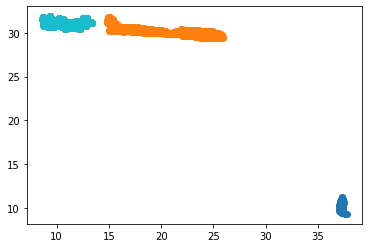

intersect
intersect
intersect
intersect
intersect
intersect
intersect
intersect
intersect
x1 [[        nan]
 [        nan]
 [38.25772414]
 [28.72265517]]


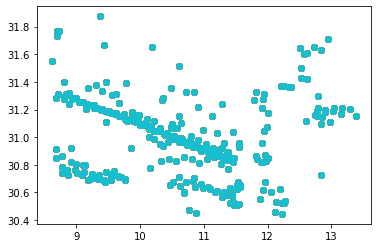

intersect
intersect
wrong
array1 [6, 6.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
array2 [6, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [144]:
# KF step 9
# complete procedure

missedmatching=0
continuedmatching=0
wrongmatching=0
clustering_error = 0
totalcomparisons = 0

c1= 1
c2 = 6

initialframe =10
endframe = 20

velx= avx
vely = avy

for c in range(c1, c2+1):
    
    # find the coordinates of the initial cluster
    
    initialcluster = c
    
    pathname = "file_out"+str(iframe)+".csv"
    firstrow=0
    
    xvalues1= []
    yvalues1 = []
    
    with open(pathname) as csv_file:
        m = f
        currentmap={}
        csv_reader = csv.reader(csv_file, delimiter=",")
        
        for row in csv_reader:
            # don't skip first row
            clusterid = float(row[0])
            xpoint = float(row[1])
            ypoint = float(row[2])
            if clusterid == initialcluster:
                xvalues1.append(xpoint)
                yvalues1.append(ypoint)
    # find x1 based on icluster 
    avx1 = np.mean(xvalues1)
    avy1 = np.mean(yvalues1)
    
    x1 = array(([[avx1], [avy1], [velx], [vely]])) 
    
    print("x1", x1)
    # array to be plotted
    arrayx = []

    arrayy = []

    xvalues = []
    yvalues = []

    finalarray=[]
    
    finalarray.append(initialcluster)
    totxvalues = defaultdict(list)
    totyvalues = defaultdict(list)
    # initialize distances map 
    mapdistances = defaultdict(list)
    clusters = defaultdict(list)
    
    obnum =0

    currentdistances = []
    
    listclusterids=[]

    for j in range(0, mx):
        mapdistances[j]=[]
        totxvalues[j] = []
        totyvalues[j] = []
        clusters[j] = []
    
    outputclusters = []
    outputclusters.append(initialcluster)
    for i in range(initialframe+1, endframe+1): # not need to process initial frame, must iterate over endframe
        name = "file_out"
        name = name+str(i)
        name = name+".csv"
        firstrow=0
        for j in range(0, mx):
            mapdistances[j] =[]
            totxvalues[j] =[]
            totyvalues[j]=[]
            clusters[j] = []
            
        # predict
        x1, P = predict1(x1, P)
        with open(pathname) as csv_file:
            m = f
            currentmap={}
            csv_reader = csv.reader(csv_file, delimiter=",")

            for row in csv_reader:
                # don't skip first row
                clusterid = float(row[0])

                if clusterid != obnum:
                    numo1 = float(obnum)
                    mapdistances[numo1] = currentdistances
                    totxvalues[numo1] = xvalues
                    totyvalues[numo1] = yvalues
                    clusters[numo1] = currentcluster
                    obnum = clusterid
                    currentdistances=[]
                    xvalues=[]
                    yvalues=[]
                    continue

                xpoint = float(row[1])
                ypoint = float(row[2])
                xvalues.append(xpoint)
                yvalues.append(ypoint)
                currentcluster = clusterid

                # distance from predicted point x1
                dx1 = x1[0] - xpoint
                dy1 = x1[1] - ypoint
                d1 = pow(dx1,2)+pow(dy1,2)
                dist = math.sqrt(d1)
                # save
                currentdistances.append(dist)
            # find min
            for j in range(0, mx):
                meandistances = np.mean(mapdistances[j])
                if meandistances <m:
                    m = meandistances
                    ky =j
            outputclusters.append(clusters[ky])
            hxvalues = totxvalues[ky]
            hyvalues = totyvalues[ky]

            #print("hxvalues", hxvalues)
            #print("hyvalues", hyvalues)
            
            avx = np.mean(hxvalues)
            avy = np.mean(hyvalues)

            # measurement, update
            z1 = [avx, avy]

            x1, P = update2(x1, P, z1)

            plt.scatter(hxvalues, hyvalues)

            hxvalues=[]
            hyvalues=[]
    # app result
    
    plt.show()
    
    listclusterids = outputclusters
    currentframe = initialframe

    #initialcluster 

    result = []
    result.append(initialcluster)
    
    iframe = initialframe
    currentcluster = initialcluster
    t =True
    while t:
        nextres = findnextclusterapp(iframe, currentcluster)
        if str(nextres) == "nan":
            break
        if iframe >= endframe:
            break
        result.append(nextres)
        iframe = iframe+1
        currentcluster = nextres
    len1 = len(result) #datastore result
    len2 = len(listclusterids) # our result 

    setlen = min(len1, len2)
    # orig dictionary
    od1 = {} # app 
    od2 = {}

    booleanwrong = []
    for j1 in range(0,setlen):
        nolongerwrong=0
        nolongerwrongoriginal=0
        frameno=initialframe+j1
        od1[frameno]=[result[j1]]
        od2[frameno]=[listclusterids[j1]]
        if result[j1]==listclusterids[j1]:
            nolongerwrong=1
            nolongerwrongoriginal=1
        if result[j1]!= listclusterids[j1]:
            v1 = errorclusters.get(frameno)
            if v1!=None:
                errorarray= errorclusters[frameno]
                for el in errorarray:
                    if result[j1] in el:
                        if listclusterids[j1] in el:
                            nolongerwrong=1
        if nolongerwrong!=1:
            booleanwrong.append(1) # wrong
        else:
            booleanwrong.append(0) # not wrong
            if nolongerwrongoriginal==0:
                clustering_error = clustering_error+1
    maxlen= max(len1, len2)
    last1 = result[setlen-1]
    last2 = listclusterids[setlen-1]
    if len1 != len2:
# iterate over setlen to max len
        for j2 in range(setlen, maxlen):
            nolongerwrong=0
            nolongerwrongoriginal = 0 
            frameno2 = initialframe+j2
            if len1 > len2:
                next2 = findnextclusterKF(frameno2, last2)
                if next2 == result[j2]:
                    nolongerwrong=1
                    nolongerwrongoriginal = 1
                v2 = errorclusters.get(frameno2)
                #print("v2", v2)
                if v2 != None:
                    errorarray = errorclusters[frameno2]
                    for el in errorarray:
                        if result[j2] in el:
                            if next2 in el:
                                nolongerwrong=1
                if nolongerwrong==1:
                    booleanwrong.append(0) # not wrong
                    if nolongeroriginal==0:
                        clustering_error=clustering_error+1
                else:
                    booleanwrong.append(1) 
            if len2 > len1:
                next2 = findnextclusterapp(frameno2, last2)
                if next2 == listclusterids[j2]:
                    nolongerwrong=1
                    nolongerwrongoriginal=1
                v2 = errorclusters.get(frameno2)
                if v2 != None:
                    errorarray = errorclusters[frameno2]
                    for el in errorarray:
                        if listclusterids[j2] in el:
                            if next2 in el:
                                nolongerwrong=1
                if nolongerwrong==1:
                    booleanwrong.append(0)
                    if nolongerwrongoriginal==0:
                        clustering_error=clustering_error+1
                else:
                    booleanwrong.append(1) # wrong
                last2 = next2
    d1 = {}
    d2 = {}
    for j1 in range(0, setlen):
        frameno = initialframe+j1
        # check similar clusters
        clusters1 = od1[frameno]
        clusters2 = od2[frameno]

        simclusters = errorclusters.get(frameno)
        if simclusters != None:
            simarray = errorclusters[frameno]
            # check if matches
            for el in simarray:
                if od1[frameno] in el:
                    clusters1.extend(el)
                if od2[frameno] in el:
                    clusters2.extend(el)
        d1[frameno] = clusters1
        d2[frameno] = clusters2
    # add empty entries for range setlen to maxlen   
    maxlen= max(len1, len2)
    for j2 in range(setlen, maxlen):
        frameno = initialframe+j2
        d1[frameno] = []
        d2[frameno] = []
        if len1>len2:
            d1[frameno]= [result[j2]]
        if len2>len1:
            d2[frameno]=[listclusterids[j2]]
    d1[initialframe+maxlen] = []
    d2[initialframe+maxlen] = []
    # eval 3 
    setlen = min(len1, len2)
    for j in range(0, maxlen):
        frameno = initialframe+j 
        # all clusters within current frame
        clust1 = d1[frameno]
        clust2 = d2[frameno]
        for c1 in clust1:
            nc1 = findnextclusterapp(frameno, c1)
            if str(nc1) == "nan":
                print("nc1 is nan")
                continue
            nclust1 = d1[frameno+1]
            # only append if not already there
            if nc1 not in nclust1:
                nclust1.append(nc1)
            d1[frameno+1] = nclust1
        for c2 in clust2:
            nc2 = findnextclusterdist(frameno, c2)
            if nc2 == -1:
                continue
            nclust2 = d2[frameno+1]
            if nc2 not in nclust2:
                nclust2.append(nc2)
            d2[frameno+1] = nclust2
        if booleanwrong[j] == 1: # look for wrong
            # look for matching id from both arrays
            set1 = set(clust1)
            intersect= set1.intersection(clust2)
            if len(intersect) >0:
                print("intersect")
                booleanwrong[j]=0 
                # increment clustering error
                clustering_error = clustering_error+1
    bindex = 1
    firstframewrong = -1
    for b in booleanwrong:
        if b == 1:
            firstframewrong = bindex
            break
        bindex= bindex+1

    if firstframewrong == -1:
        totalcomparisons= totalcomparisons+maxlen
    else:
        totalcomparisons= totalcomparisons+firstframewrong
        
    contflag = 0
    missedflag= 0
    
    if np.sum(booleanwrong) >0:
        if firstframewrong>len1:
            print("continued")
            print("array1", result)
            print("array2", listclusterids)
            contflag= 1
            continuedmatching= continuedmatching+1
        if firstframewrong > len2: 
            print("missed")
            print("array1", result)
            print("array2", listclusterids)
            missedmatching = missedmatching+1
            missedflag=1
        if contflag==0 and missedflag==0:
            print("wrong")
            print("array1", result)
            print("array2", listclusterids)
            wrongmatching= wrongmatching+1
        
        if contflag==1 and missedflag==1:
            print("BOTH CONTINUED AND MISSED")





In [105]:
initialframe

1

In [111]:
print("total", totalcomparisons)

print("missed", missedmatching)
print("continued", continuedmatching)
print("wrong", wrongmatching)
print("clustering err", clustering_error)

total 48
missed 0
continued 0
wrong 5
clustering err 40


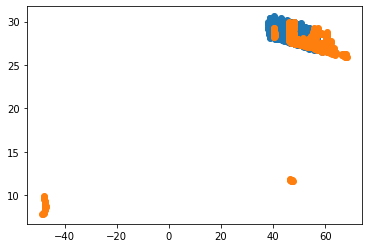

In [115]:
# plot other clusters

array1= [3, 4.0, 5.0, 4.0, 5.0, 4.0, 5.0, 4.0, 4.0, 7.0]
array2= [3, 5.0, 7.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

result=array1
result2= array2

alen = len(result)
alen2 = len(result2)


acounter=0
# counter for array el

xv1 =[]
yv1=[]
xv2 = []
yv2 = []

for i in range(initialframe, initialframe+alen):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    
    
    a = result[acounter]
    xarray = []
    yarray = []
    with open(name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        for row in csv_reader:
            clusterid = float(row[0])
            xpoint = float(row[1])
            ypoint = float(row[2])
            
            if clusterid == a:
                xarray.append(xpoint)
                yarray.append(ypoint)
                
                
        # plot
        xv1.extend(xarray)
        yv1.extend(yarray)
        #plt.scatter(xarray,yarray)
    
    acounter =acounter +1
    if acounter > alen:
        break

acounter=0
for i in range(initialframe, initialframe+alen2):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"

    
    a = result2[acounter]
    xarray = []
    yarray = []
    with open(name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        for row in csv_reader:
            clusterid = float(row[0])
            xpoint = float(row[1])
            ypoint = float(row[2])
            
            if clusterid == a:
                xarray.append(xpoint)
                yarray.append(ypoint)
                
                
        # plot
        xv2.extend(xarray)
        yv2.extend(yarray)
        #plt.scatter(xarray,yarray)
    
    acounter =acounter +1
    if acounter > alen2:
        break

#plt.scatter(xv2, yv2)
plt.scatter(xv1, yv1)
plt.scatter(xv2, yv2)
plt.show()



    